In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from LogisticRegression import LogisticClassifier as mylogit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
def plot_(coefs,degree):
    theta = np.array([[w]for w in coefs])
    X=dt.iloc[:,:-1].values
    y=dt.iloc[:,-1].values
    pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
    plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",label="Admitted")
    plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="x",label="Not admitted")
    # Plotting decision boundary

    u_vals = np.linspace(-1,1.5,50)
    v_vals= np.linspace(-1,1.5,50)
    z=np.zeros((len(u_vals),len(v_vals)))
    for i in range(len(u_vals)):
        for j in range(len(v_vals)):
            z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],degree) @ theta
    plt.contour(u_vals,v_vals,z.T,0)
    plt.xlabel("F1")
    plt.ylabel("F2")
    plt.legend(loc=0)

In [3]:
dt = pd.read_csv('microchip_data.txt',header = None)
X = dt.iloc[:,:2]
y = dt.iloc[:,2]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)

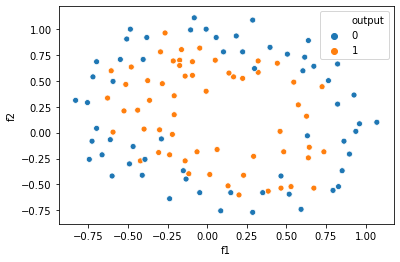

In [5]:
dt.columns = ['f1','f2','output']
sns.scatterplot(x='f1', y='f2',hue='output', data=dt)

In [6]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
poly_features = PolynomialFeatures(degree = 1) #To ensure no intercept is added
X_train=poly_features.fit_transform(X_train)
X_test = poly_features.transform(X_test)
print(X_train.shape)
no_reg = linear_model.LogisticRegression(penalty = 'none', solver = 'newton-cg', fit_intercept=True)
no_reg.fit(X_train,y_train)
accuracy_score(y_test, no_reg.predict(X_test))

(88, 3)


0.36666666666666664

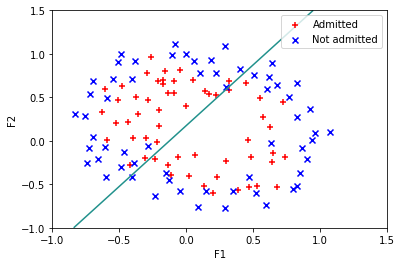

In [8]:
plot_(no_reg.coef_[0],1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
poly_features = PolynomialFeatures(degree = 6) #To ensure no intercept is added
X_train=poly_features.fit_transform(X_train)
X_test = poly_features.transform(X_test)

In [10]:
print(X_train.shape, X_test.shape)

(59, 28) (59, 28)


In [11]:
no_reg = linear_model.LogisticRegression(penalty = 'none', solver = 'newton-cg') #
no_reg.fit(X_train,y_train)
accuracy_score(y_test, no_reg.predict(X_test))

0.6610169491525424

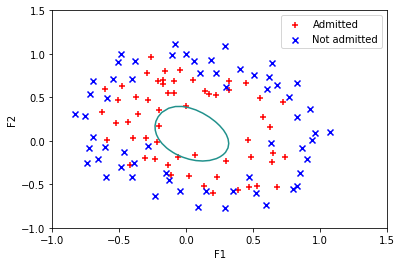

In [12]:
plot_(no_reg.coef_[0],6)


In [13]:
#penalty = [ 'l2']
C = np.arange(0.01,5,0.05) #Remeber, lower is greater regularization
C = np.append(0.001,C)
hyperparameters = dict(C=C)
sk_logistic = linear_model.LogisticRegression(solver = 'liblinear') #Supports both regularization types 
clf = GridSearchCV(sk_logistic, hyperparameters, verbose=1)
best_model = clf.fit(X_train, y_train)

C:\Users\Abhishek Kapoor\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 101 candidates, totalling 303 fits


[Parallel(n_jobs=1)]: Done 303 out of 303 | elapsed:    0.2s finished
C:\Users\Abhishek Kapoor\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [14]:
best_model.best_params_ 

{'C': 2.66}

In [15]:
accuracy_score(y_test, best_model.predict(X_test))

0.847457627118644

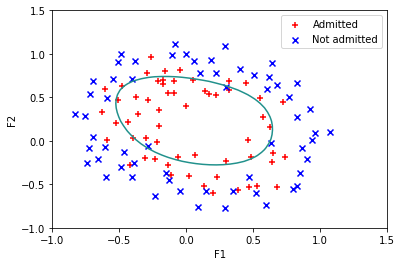

In [16]:
plot_(best_model.best_estimator_.coef_[0],6)

In [22]:
model = mylogit(tol=1e-5, max_iter=10000, intercept=False)
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.847457627118644

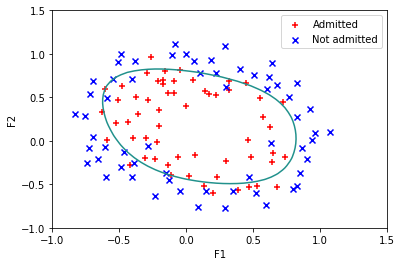

In [18]:
plot_(model.beta,6)

In [21]:
dropout_rates = np.arange(0.00,0.55,0.05)
acc = []
for c in dropout_rates:
    model = mylogit(tol=1e-5, max_iter=20000,dropout_rate=c, intercept=False)
    model.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, model.predict(X_test)))
    print(f'Dropout : {round(c,2)}, test accuracy: {round(acc[-1],4)}, convergence: {model.converged}, rounds : {model.iterations}')
    


Dropout : 0.0, test accuracy: 0.8475, convergence: True, rounds : 3998
Dropout : 0.05, test accuracy: 0.8475, convergence: True, rounds : 7170
Dropout : 0.1, test accuracy: 0.8475, convergence: True, rounds : 7598
Dropout : 0.15, test accuracy: 0.8475, convergence: True, rounds : 7887
Dropout : 0.2, test accuracy: 0.8475, convergence: True, rounds : 8184
Dropout : 0.25, test accuracy: 0.8305, convergence: True, rounds : 8868
Dropout : 0.3, test accuracy: 0.8305, convergence: True, rounds : 8881
Dropout : 0.35, test accuracy: 0.8305, convergence: True, rounds : 8857
Dropout : 0.4, test accuracy: 0.8136, convergence: True, rounds : 11970
Dropout : 0.45, test accuracy: 0.8136, convergence: True, rounds : 12617
Dropout : 0.5, test accuracy: 0.8475, convergence: True, rounds : 9852


In [23]:
model = mylogit(tol=1e-5, max_iter=10000, intercept=False,dropout_rate=0.1)
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.847457627118644

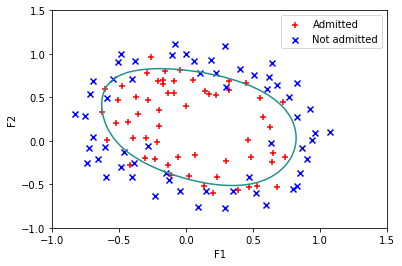

In [24]:
plot_(model.beta,6)

In [25]:
model = mylogit(tol=1e-5, max_iter=10000, intercept=False,dropout_rate=1,early_stopping=50,verbose=True,validation_set=(X_test,y_test))
model.fit(X_train, y_train)

round 0, train_loss: 0.6825810620436247, val_loss: 0.6925886990876448 
round 1, train_loss: 0.6818727222338438, val_loss: 0.6921661500181676 
round 2, train_loss: 0.6811830742225082, val_loss: 0.6917482726095926 
round 3, train_loss: 0.6805109237323764, val_loss: 0.6913343609410385 
round 4, train_loss: 0.679855158689652, val_loss: 0.6909237752626188 
round 5, train_loss: 0.6792147435249271, val_loss: 0.6905159367878009 
round 6, train_loss: 0.6785887138638239, val_loss: 0.6901103228623601 
round 7, train_loss: 0.6779761715821243, val_loss: 0.6897064624851228 
round 8, train_loss: 0.6773762802015484, val_loss: 0.6893039321570021 
round 9, train_loss: 0.6767882606036746, val_loss: 0.6889023520361163 
round 10, train_loss: 0.67621138704079, val_loss: 0.6885013823780498 
round 11, train_loss: 0.6756449834237204, val_loss: 0.6881007202415332 
round 12, train_loss: 0.6750884198679062, val_loss: 0.6877000964410313 
round 13, train_loss: 0.6745411094801381, val_loss: 0.6872992727288603 
round

round 161, train_loss: 0.6198186699423422, val_loss: 0.6254331923732939 
round 162, train_loss: 0.6195216832969483, val_loss: 0.6250642846852221 
round 163, train_loss: 0.6192253716016327, val_loss: 0.6246962899559358 
round 164, train_loss: 0.6189297323355709, val_loss: 0.6243292057555112 
round 165, train_loss: 0.6186347629940706, val_loss: 0.6239630296144957 
round 166, train_loss: 0.6183404610883518, val_loss: 0.6235977590259748 
round 167, train_loss: 0.6180468241453421, val_loss: 0.623233391447566 
round 168, train_loss: 0.6177538497074752, val_loss: 0.6228699243033459 
round 169, train_loss: 0.6174615353324902, val_loss: 0.6225073549857066 
round 170, train_loss: 0.6171698785932463, val_loss: 0.6221456808571472 
round 171, train_loss: 0.6168788770775345, val_loss: 0.6217848992520008 
round 172, train_loss: 0.6165885283878996, val_loss: 0.6214250074781028 
round 173, train_loss: 0.6162988301414641, val_loss: 0.6210660028183949 
round 174, train_loss: 0.616009779969758, val_loss: 

round 321, train_loss: 0.5795135114829264, val_loss: 0.5761795530734535 
round 322, train_loss: 0.5793000317483467, val_loss: 0.5759226935139073 
round 323, train_loss: 0.5790869543461322, val_loss: 0.5756663520809886 
round 324, train_loss: 0.5788742781220679, val_loss: 0.5754105270546784 
round 325, train_loss: 0.5786620019265822, val_loss: 0.5751552167236236 
round 326, train_loss: 0.5784501246147187, val_loss: 0.5749004193850851 
round 327, train_loss: 0.5782386450461113, val_loss: 0.5746461333448818 
round 328, train_loss: 0.5780275620849591, val_loss: 0.5743923569173379 
round 329, train_loss: 0.5778168746000009, val_loss: 0.5741390884252302 
round 330, train_loss: 0.5776065814644871, val_loss: 0.573886326199734 
round 331, train_loss: 0.5773966815561575, val_loss: 0.5736340685803705 
round 332, train_loss: 0.5771871737572152, val_loss: 0.5733823139149541 
round 333, train_loss: 0.5769780569543015, val_loss: 0.5731310605595408 
round 334, train_loss: 0.5767693300384716, val_loss:

round 481, train_loss: 0.5498053892427299, val_loss: 0.5407095509835664 
round 482, train_loss: 0.5496441579168797, val_loss: 0.5405183187540655 
round 483, train_loss: 0.5494831899046085, val_loss: 0.5403274105483257 
round 484, train_loss: 0.5493224845602662, val_loss: 0.5401368255233053 
round 485, train_loss: 0.5491620412403402, val_loss: 0.5399465628392278 
round 486, train_loss: 0.5490018593034462, val_loss: 0.5397566216595636 
round 487, train_loss: 0.5488419381103194, val_loss: 0.5395670011510126 
round 488, train_loss: 0.5486822770238041, val_loss: 0.5393777004834864 
round 489, train_loss: 0.5485228754088473, val_loss: 0.5391887188300916 
round 490, train_loss: 0.5483637326324879, val_loss: 0.5390000553671113 
round 491, train_loss: 0.5482048480638478, val_loss: 0.5388117092739887 
round 492, train_loss: 0.5480462210741243, val_loss: 0.5386236797333104 
round 493, train_loss: 0.5478878510365801, val_loss: 0.5384359659307879 
round 494, train_loss: 0.5477297373265358, val_loss

round 639, train_loss: 0.5272275667276773, val_loss: 0.5140399834339496 
round 640, train_loss: 0.5271011146443954, val_loss: 0.5138912312409035 
round 641, train_loss: 0.5269748455272348, val_loss: 0.5137427013761251 
round 642, train_loss: 0.5268487589805876, val_loss: 0.5135943933524386 
round 643, train_loss: 0.5267228546099927, val_loss: 0.5134463066841872 
round 644, train_loss: 0.5265971320221349, val_loss: 0.5132984408872253 
round 645, train_loss: 0.5264715908248375, val_loss: 0.5131507954789138 
round 646, train_loss: 0.52634623062706, val_loss: 0.5130033699781121 
round 647, train_loss: 0.5262210510388935, val_loss: 0.5128561639051743 
round 648, train_loss: 0.5260960516715562, val_loss: 0.512709176781939 
round 649, train_loss: 0.5259712321373896, val_loss: 0.5125624081317263 
round 650, train_loss: 0.5258465920498552, val_loss: 0.5124158574793297 
round 651, train_loss: 0.525722131023529, val_loss: 0.512269524351011 
round 652, train_loss: 0.525597848674098, val_loss: 0.51

round 798, train_loss: 0.5091863116520501, val_loss: 0.49289521279774634 
round 799, train_loss: 0.5090846422833508, val_loss: 0.49277654758488043 
round 800, train_loss: 0.5089831050556669, val_loss: 0.49265804280965425 
round 801, train_loss: 0.5088816997134156, val_loss: 0.49253969816349774 
round 802, train_loss: 0.5087804260016795, val_loss: 0.4924215133386583 
round 803, train_loss: 0.5086792836662004, val_loss: 0.492303488028198 
round 804, train_loss: 0.5085782724533805, val_loss: 0.49218562192599097 
round 805, train_loss: 0.5084773921102779, val_loss: 0.49206791472672073 
round 806, train_loss: 0.5083766423846067, val_loss: 0.4919503661258768 
round 807, train_loss: 0.5082760230247326, val_loss: 0.49183297581975133 
round 808, train_loss: 0.508175533779673, val_loss: 0.49171574350543806 
round 809, train_loss: 0.5080751743990924, val_loss: 0.4915986688808279 
round 810, train_loss: 0.507974944633303, val_loss: 0.49148175164460683 
round 811, train_loss: 0.5078748442332599, va

round 960, train_loss: 0.49427799230380937, val_loss: 0.47556944786011096 
round 961, train_loss: 0.4941948050336026, val_loss: 0.4754732483275023 
round 962, train_loss: 0.4941117158535059, val_loss: 0.47537716820672227 
round 963, train_loss: 0.4940287245922058, val_loss: 0.4752812072914552 
round 964, train_loss: 0.49394583107879136, val_loss: 0.47518536537586625 
round 965, train_loss: 0.49386303514275137, val_loss: 0.4750896422545997 
round 966, train_loss: 0.4937803366139742, val_loss: 0.47499403772277815 
round 967, train_loss: 0.4936977353227455, val_loss: 0.47489855157599997 
round 968, train_loss: 0.49361523109974853, val_loss: 0.47480318361033996 
round 969, train_loss: 0.49353282377606195, val_loss: 0.47470793362234476 
round 970, train_loss: 0.49345051318315936, val_loss: 0.4746128014090342 
round 971, train_loss: 0.4933682991529062, val_loss: 0.4745177867678989 
round 972, train_loss: 0.4932861815175622, val_loss: 0.47442288949689826 
round 973, train_loss: 0.493204160109

round 1113, train_loss: 0.48259876819678443, val_loss: 0.4621283692890862 
round 1114, train_loss: 0.4825288082325277, val_loss: 0.4620482933958781 
round 1115, train_loss: 0.4824589242063385, val_loss: 0.4619683101929551 
round 1116, train_loss: 0.48238911599670853, val_loss: 0.46188841953338433 
round 1117, train_loss: 0.4823193834823887, val_loss: 0.4618086212705427 
round 1118, train_loss: 0.4822497265423903, val_loss: 0.46172891525811605 
round 1119, train_loss: 0.48218014505598417, val_loss: 0.461649301350099 
round 1120, train_loss: 0.4821106389026999, val_loss: 0.4615697794007936 
round 1121, train_loss: 0.48204120796232464, val_loss: 0.4614903492648084 
round 1122, train_loss: 0.4819718521149027, val_loss: 0.4614110107970579 
round 1123, train_loss: 0.48190257124073516, val_loss: 0.4613317638527618 
round 1124, train_loss: 0.4818333652203786, val_loss: 0.4612526082874436 
round 1125, train_loss: 0.481764233934645, val_loss: 0.46117354395693083 
round 1126, train_loss: 0.481695

round 1272, train_loss: 0.4723552839462238, val_loss: 0.4504713315668872 
round 1273, train_loss: 0.4722960268391243, val_loss: 0.45040433213019354 
round 1274, train_loss: 0.4722368292144309, val_loss: 0.45033740542861506 
round 1275, train_loss: 0.47217769098454926, val_loss: 0.45027055135557953 
round 1276, train_loss: 0.47211861206205885, val_loss: 0.45020376980471966 
round 1277, train_loss: 0.4720595923597105, val_loss: 0.45013706066987474 
round 1278, train_loss: 0.47200063179042673, val_loss: 0.45007042384508744 
round 1279, train_loss: 0.47194173026730224, val_loss: 0.4500038592246059 
round 1280, train_loss: 0.47188288770360165, val_loss: 0.4499373667028815 
round 1281, train_loss: 0.4718241040127606, val_loss: 0.4498709461745692 
round 1282, train_loss: 0.4717653791083847, val_loss: 0.44980459753452634 
round 1283, train_loss: 0.4717067129042492, val_loss: 0.44973832067781333 
round 1284, train_loss: 0.47164810531429857, val_loss: 0.44967211549969177 
round 1285, train_loss:

round 1421, train_loss: 0.46413767847493265, val_loss: 0.4412366045094116 
round 1422, train_loss: 0.4640864039157063, val_loss: 0.4411793695971669 
round 1423, train_loss: 0.46403517748191275, val_loss: 0.4411221935649487 
round 1424, train_loss: 0.46398399910756344, val_loss: 0.4410650763320198 
round 1425, train_loss: 0.46393286872679074, val_loss: 0.4410080178177879 
round 1426, train_loss: 0.46388178627384624, val_loss: 0.4409510179418051 
round 1427, train_loss: 0.4638307516831031, val_loss: 0.4408940766237684 
round 1428, train_loss: 0.4637797648890535, val_loss: 0.4408371937835177 
round 1429, train_loss: 0.4637288258263096, val_loss: 0.4407803693410373 
round 1430, train_loss: 0.46367793442960326, val_loss: 0.44072360321645504 
round 1431, train_loss: 0.46362709063378466, val_loss: 0.4406668953300409 
round 1432, train_loss: 0.46357629437382336, val_loss: 0.440610245602208 
round 1433, train_loss: 0.46352554558480746, val_loss: 0.4405536539535116 
round 1434, train_loss: 0.463

round 1580, train_loss: 0.4565490377141487, val_loss: 0.43282624449690194 
round 1581, train_loss: 0.45650465901277326, val_loss: 0.4327774449031815 
round 1582, train_loss: 0.4564603192961863, val_loss: 0.4327286929784388 
round 1583, train_loss: 0.4564160185145492, val_loss: 0.4326799886613931 
round 1584, train_loss: 0.4563717566181082, val_loss: 0.43263133189086644 
round 1585, train_loss: 0.4563275335571937, val_loss: 0.4325827226057823 
round 1586, train_loss: 0.4562833492822208, val_loss: 0.43253416074516693 
round 1587, train_loss: 0.4562392037436889, val_loss: 0.43248564624814806 
round 1588, train_loss: 0.4561950968921805, val_loss: 0.4324371790539552 
round 1589, train_loss: 0.4561510286783632, val_loss: 0.43238875910192 
round 1590, train_loss: 0.45610699905298757, val_loss: 0.4323403863314741 
round 1591, train_loss: 0.45606300796688776, val_loss: 0.43229206068215126 
round 1592, train_loss: 0.4560190553709809, val_loss: 0.4322437820935853 
round 1593, train_loss: 0.455975

round 1738, train_loss: 0.44999057386830615, val_loss: 0.42567003067451537 
round 1739, train_loss: 0.4499517870569113, val_loss: 0.4256280638621007 
round 1740, train_loss: 0.4499130323002653, val_loss: 0.4255861361819443 
round 1741, train_loss: 0.4498743095599347, val_loss: 0.4255442475866174 
round 1742, train_loss: 0.44983561879754674, val_loss: 0.4255023980287648 
round 1743, train_loss: 0.4497969599747898, val_loss: 0.4254605874611064 
round 1744, train_loss: 0.4497583330534133, val_loss: 0.4254188158364363 
round 1745, train_loss: 0.4497197379952267, val_loss: 0.4253770831076219 
round 1746, train_loss: 0.44968117476210046, val_loss: 0.425335389227605 
round 1747, train_loss: 0.4496426433159656, val_loss: 0.425293734149401 
round 1748, train_loss: 0.44960414361881296, val_loss: 0.42525211782609873 
round 1749, train_loss: 0.4495656756326939, val_loss: 0.42521054021086124 
round 1750, train_loss: 0.4495272393197199, val_loss: 0.4251690012569235 
round 1751, train_loss: 0.4494888

round 1895, train_loss: 0.44427067084583716, val_loss: 0.4195321570667174 
round 1896, train_loss: 0.44423648182614134, val_loss: 0.4194957970009033 
round 1897, train_loss: 0.4442023195040126, val_loss: 0.41945946944831103 
round 1898, train_loss: 0.44416818384927415, val_loss: 0.41942317437161447 
round 1899, train_loss: 0.44413407483179373, val_loss: 0.4193869117335419 
round 1900, train_loss: 0.44409999242148435, val_loss: 0.41935068149687754 
round 1901, train_loss: 0.44406593658830357, val_loss: 0.41931448362445994 
round 1902, train_loss: 0.444031907302254, val_loss: 0.41927831807918275 
round 1903, train_loss: 0.4439979045333827, val_loss: 0.41924218482399506 
round 1904, train_loss: 0.44396392825178155, val_loss: 0.41920608382190017 
round 1905, train_loss: 0.44392997842758675, val_loss: 0.41917001503595624 
round 1906, train_loss: 0.4438960550309787, val_loss: 0.41913397842927597 
round 1907, train_loss: 0.44386215803218293, val_loss: 0.41909797396502624 
round 1908, train_lo

round 2046, train_loss: 0.4393943927793813, val_loss: 0.4143900953445866 
round 2047, train_loss: 0.4393639170076464, val_loss: 0.4143582511543497 
round 2048, train_loss: 0.4393334638426929, val_loss: 0.4143264344141518 
round 2049, train_loss: 0.4393030332602818, val_loss: 0.4142946450939773 
round 2050, train_loss: 0.43927262523620875, val_loss: 0.41426288316385207 
round 2051, train_loss: 0.43924223974630305, val_loss: 0.414231148593845 
round 2052, train_loss: 0.43921187676642875, val_loss: 0.4141994413540657 
round 2053, train_loss: 0.4391815362724825, val_loss: 0.4141677614146668 
round 2054, train_loss: 0.43915121824039666, val_loss: 0.41413610874584256 
round 2055, train_loss: 0.43912092264613606, val_loss: 0.41410448331782823 
round 2056, train_loss: 0.4390906494657, val_loss: 0.4140728851009027 
round 2057, train_loss: 0.4390603986751213, val_loss: 0.4140413140653844 
round 2058, train_loss: 0.43903017025046676, val_loss: 0.4140097701816345 
round 2059, train_loss: 0.4389999

round 2204, train_loss: 0.43484478963768375, val_loss: 0.40968081768843934 
round 2205, train_loss: 0.4348176057239048, val_loss: 0.4096529637981247 
round 2206, train_loss: 0.43479044097498, val_loss: 0.40962513309473186 
round 2207, train_loss: 0.434763295371395, val_loss: 0.4095973255540893 
round 2208, train_loss: 0.43473616889366157, val_loss: 0.40956954115205846 
round 2209, train_loss: 0.4347090615223176, val_loss: 0.4095417798645323 
round 2210, train_loss: 0.43468197323792745, val_loss: 0.4095140416674366 
round 2211, train_loss: 0.43465490402108004, val_loss: 0.40948632653672856 
round 2212, train_loss: 0.43462785385239155, val_loss: 0.4094586344483982 
round 2213, train_loss: 0.43460082271250305, val_loss: 0.40943096537846674 
round 2214, train_loss: 0.43457381058208155, val_loss: 0.4094033193029882 
round 2215, train_loss: 0.4345468174418206, val_loss: 0.40937569619804776 
round 2216, train_loss: 0.43451984327243814, val_loss: 0.40934809603976263 
round 2217, train_loss: 0.

round 2359, train_loss: 0.430848710717219, val_loss: 0.40562619896949476 
round 2360, train_loss: 0.43082427935031814, val_loss: 0.40560166905048634 
round 2361, train_loss: 0.4307998644096637, val_loss: 0.4055771589269059 
round 2362, train_loss: 0.43077546587930626, val_loss: 0.4055526685790087 
round 2363, train_loss: 0.43075108374331583, val_loss: 0.4055281979870737 
round 2364, train_loss: 0.43072671798578355, val_loss: 0.40550374713140624 
round 2365, train_loss: 0.4307023685908201, val_loss: 0.40547931599233605 
round 2366, train_loss: 0.43067803554255685, val_loss: 0.405454904550218 
round 2367, train_loss: 0.4306537188251444, val_loss: 0.4054305127854323 
round 2368, train_loss: 0.43062941842275443, val_loss: 0.4054061406783832 
round 2369, train_loss: 0.43060513431957764, val_loss: 0.40538178820950127 
round 2370, train_loss: 0.43058086649982574, val_loss: 0.40535745535924056 
round 2371, train_loss: 0.43055661494773007, val_loss: 0.40533314210808086 
round 2372, train_loss: 

round 2519, train_loss: 0.42713845551433394, val_loss: 0.40194061220829935 
round 2520, train_loss: 0.4271164622185045, val_loss: 0.4019190142607639 
round 2521, train_loss: 0.4270944830342254, val_loss: 0.4018974332446129 
round 2522, train_loss: 0.4270725179484125, val_loss: 0.40187586914366763 
round 2523, train_loss: 0.42705056694799715, val_loss: 0.40185432194176934 
round 2524, train_loss: 0.42702863001992697, val_loss: 0.4018327916227787 
round 2525, train_loss: 0.4270067071511649, val_loss: 0.40181127817057577 
round 2526, train_loss: 0.4269847983286902, val_loss: 0.4017897815690607 
round 2527, train_loss: 0.4269629035394968, val_loss: 0.40176830180215295 
round 2528, train_loss: 0.4269410227705953, val_loss: 0.40174683885379137 
round 2529, train_loss: 0.4269191560090115, val_loss: 0.4017253927079346 
round 2530, train_loss: 0.4268973032417869, val_loss: 0.4017039633485604 
round 2531, train_loss: 0.4268754644559785, val_loss: 0.4016825507596662 
round 2532, train_loss: 0.426

round 2676, train_loss: 0.42385040733985574, val_loss: 0.3987472980450655 
round 2677, train_loss: 0.4238304787711361, val_loss: 0.398728171969285 
round 2678, train_loss: 0.42381056243907433, val_loss: 0.3987090605083461 
round 2679, train_loss: 0.42379065833279955, val_loss: 0.39868996364882986 
round 2680, train_loss: 0.4237707664414534, val_loss: 0.3986708813773323 
round 2681, train_loss: 0.4237508867541902, val_loss: 0.3986518136804646 
round 2682, train_loss: 0.42373101926017653, val_loss: 0.3986327605448546 
round 2683, train_loss: 0.4237111639485918, val_loss: 0.39861372195714484 
round 2684, train_loss: 0.42369132080862754, val_loss: 0.39859469790399343 
round 2685, train_loss: 0.42367148982948805, val_loss: 0.39857568837207463 
round 2686, train_loss: 0.4236516710003896, val_loss: 0.39855669334807803 
round 2687, train_loss: 0.42363186431056116, val_loss: 0.39853771281870803 
round 2688, train_loss: 0.42361206974924437, val_loss: 0.398518746770685 
round 2689, train_loss: 0.

round 2834, train_loss: 0.42084675356932244, val_loss: 0.3958983651154194 
round 2835, train_loss: 0.42082863121975095, val_loss: 0.3958813912929811 
round 2836, train_loss: 0.4208105195338564, val_loss: 0.39586443014545414 
round 2837, train_loss: 0.42079241850254434, val_loss: 0.3958474816616348 
round 2838, train_loss: 0.42077432811672955, val_loss: 0.39583054583033067 
round 2839, train_loss: 0.4207562483673381, val_loss: 0.395813622640363 
round 2840, train_loss: 0.420738179245305, val_loss: 0.3957967120805651 
round 2841, train_loss: 0.42072012074157583, val_loss: 0.39577981413978264 
round 2842, train_loss: 0.420702072847106, val_loss: 0.39576292880687375 
round 2843, train_loss: 0.42068403555286055, val_loss: 0.395746056070709 
round 2844, train_loss: 0.4206660088498153, val_loss: 0.3957291959201718 
round 2845, train_loss: 0.4206479927289553, val_loss: 0.39571234834415714 
round 2846, train_loss: 0.420629987181276, val_loss: 0.39569551333157327 
round 2847, train_loss: 0.42061

round 2992, train_loss: 0.4181100590824348, val_loss: 0.39336678220910554 
round 2993, train_loss: 0.4180935149424675, val_loss: 0.39335167972643514 
round 2994, train_loss: 0.41807698014543954, val_loss: 0.3933365882933481 
round 2995, train_loss: 0.41806045468368536, val_loss: 0.3933215079004241 
round 2996, train_loss: 0.41804393854954847, val_loss: 0.3933064385382503 
round 2997, train_loss: 0.4180274317353802, val_loss: 0.3932913801974271 
round 2998, train_loss: 0.4180109342335399, val_loss: 0.393276332868562 
round 2999, train_loss: 0.4179944460363946, val_loss: 0.39326129654227565 
round 3000, train_loss: 0.41797796713632046, val_loss: 0.39324627120919603 
round 3001, train_loss: 0.41796149752570055, val_loss: 0.3932312568599629 
round 3002, train_loss: 0.417945037196927, val_loss: 0.3932162534852252 
round 3003, train_loss: 0.4179285861423987, val_loss: 0.39320126107564224 
round 3004, train_loss: 0.41791214435452456, val_loss: 0.39318627962188346 
round 3005, train_loss: 0.41

round 3148, train_loss: 0.4156375577928566, val_loss: 0.391138768448505 
round 3149, train_loss: 0.4156223832821703, val_loss: 0.39112528177978106 
round 3150, train_loss: 0.41560721701066644, val_loss: 0.39111180480554236 
round 3151, train_loss: 0.4155920589718276, val_loss: 0.3910983375177985 
round 3152, train_loss: 0.41557690915914425, val_loss: 0.3910848799085671 
round 3153, train_loss: 0.4155617675661124, val_loss: 0.39107143196987393 
round 3154, train_loss: 0.4155466341862355, val_loss: 0.39105799369375355 
round 3155, train_loss: 0.41553150901302305, val_loss: 0.39104456507224783 
round 3156, train_loss: 0.4155163920399915, val_loss: 0.39103114609740813 
round 3157, train_loss: 0.4155012832606638, val_loss: 0.3910177367612927 
round 3158, train_loss: 0.41548618266856974, val_loss: 0.3910043370559691 
round 3159, train_loss: 0.4154710902572451, val_loss: 0.39099094697351244 
round 3160, train_loss: 0.41545600602023275, val_loss: 0.39097756650600607 
round 3161, train_loss: 0.

round 3307, train_loss: 0.4133241830733312, val_loss: 0.3891111120258069 
round 3308, train_loss: 0.4133102408991177, val_loss: 0.38909907159428186 
round 3309, train_loss: 0.4132963060062031, val_loss: 0.3890870396841904 
round 3310, train_loss: 0.41328237838903015, val_loss: 0.38907501628873703 
round 3311, train_loss: 0.41326845804204665, val_loss: 0.3890630014011312 
round 3312, train_loss: 0.413254544959706, val_loss: 0.3890509950145898 
round 3313, train_loss: 0.41324063913646747, val_loss: 0.3890389971223366 
round 3314, train_loss: 0.4132267405667952, val_loss: 0.38902700771760235 
round 3315, train_loss: 0.41321284924515905, val_loss: 0.38901502679362393 
round 3316, train_loss: 0.41319896516603394, val_loss: 0.38900305434364574 
round 3317, train_loss: 0.413185088323901, val_loss: 0.3889910903609182 
round 3318, train_loss: 0.41317121871324586, val_loss: 0.38897913483869884 
round 3319, train_loss: 0.4131573563285603, val_loss: 0.38896718777025185 
round 3320, train_loss: 0.4

round 3463, train_loss: 0.4112339107506813, val_loss: 0.3873317661349032 
round 3464, train_loss: 0.4112210405078863, val_loss: 0.3873209769013471 
round 3465, train_loss: 0.4112081767415532, val_loss: 0.38731019520616694 
round 3466, train_loss: 0.41119531944690196, val_loss: 0.3872994210435327 
round 3467, train_loss: 0.411182468619157, val_loss: 0.387288654407619 
round 3468, train_loss: 0.41116962425354736, val_loss: 0.3872778952926069 
round 3469, train_loss: 0.4111567863453068, val_loss: 0.38726714369268184 
round 3470, train_loss: 0.4111439548896731, val_loss: 0.3872563996020365 
round 3471, train_loss: 0.41113112988188877, val_loss: 0.38724566301486785 
round 3472, train_loss: 0.41111831131720106, val_loss: 0.38723493392537894 
round 3473, train_loss: 0.4111054991908616, val_loss: 0.3872242123277787 
round 3474, train_loss: 0.4110926934981266, val_loss: 0.3872134982162809 
round 3475, train_loss: 0.4110798942342561, val_loss: 0.38720279158510573 
round 3476, train_loss: 0.41106

round 3618, train_loss: 0.4093135114638236, val_loss: 0.38574598217056266 
round 3619, train_loss: 0.4093015906655277, val_loss: 0.38573629507613755 
round 3620, train_loss: 0.4092896756538493, val_loss: 0.38572661467969577 
round 3621, train_loss: 0.4092777664246527, val_loss: 0.38571694097620457 
round 3622, train_loss: 0.40926586297380535, val_loss: 0.3857072739606377 
round 3623, train_loss: 0.4092539652971787, val_loss: 0.38569761362797184 
round 3624, train_loss: 0.40924207339064816, val_loss: 0.3856879599731896 
round 3625, train_loss: 0.40923018725009264, val_loss: 0.3856783129912777 
round 3626, train_loss: 0.40921830687139515, val_loss: 0.3856686726772276 
round 3627, train_loss: 0.40920643225044206, val_loss: 0.38565903902603565 
round 3628, train_loss: 0.4091945633831238, val_loss: 0.38564941203270253 
round 3629, train_loss: 0.4091827002653345, val_loss: 0.38563979169223384 
round 3630, train_loss: 0.4091708428929722, val_loss: 0.38563017799963994 
round 3631, train_loss: 

round 3776, train_loss: 0.4074992208161514, val_loss: 0.38429536450478413 
round 3777, train_loss: 0.4074881653485202, val_loss: 0.3842866761851258 
round 3778, train_loss: 0.40747711505845446, val_loss: 0.3842779938234494 
round 3779, train_loss: 0.40746606994236734, val_loss: 0.38426931741540377 
round 3780, train_loss: 0.4074550299966766, val_loss: 0.38426064695664197 
round 3781, train_loss: 0.40744399521780233, val_loss: 0.38425198244282055 
round 3782, train_loss: 0.4074329656021683, val_loss: 0.3842433238696009 
round 3783, train_loss: 0.4074219411462013, val_loss: 0.38423467123264743 
round 3784, train_loss: 0.40741092184633065, val_loss: 0.38422602452762905 
round 3785, train_loss: 0.40739990769898987, val_loss: 0.3842173837502178 
round 3786, train_loss: 0.40738889870061523, val_loss: 0.3842087488960905 
round 3787, train_loss: 0.40737789484764597, val_loss: 0.38420011996092773 
round 3788, train_loss: 0.4073668961365246, val_loss: 0.38419149694041366 
round 3789, train_loss:

round 3932, train_loss: 0.405835012272818, val_loss: 0.38300940879012224 
round 3933, train_loss: 0.405824723048189, val_loss: 0.38300159965735436 
round 3934, train_loss: 0.4058144384781672, val_loss: 0.38299379584886406 
round 3935, train_loss: 0.40580415855962504, val_loss: 0.38298599736086497 
round 3936, train_loss: 0.405793883289436, val_loss: 0.382978204189575 
round 3937, train_loss: 0.40578361266447716, val_loss: 0.3829704163312146 
round 3938, train_loss: 0.40577334668162857, val_loss: 0.3829626337820081 
round 3939, train_loss: 0.40576308533777233, val_loss: 0.3829548565381833 
round 3940, train_loss: 0.4057528286297933, val_loss: 0.38294708459597077 
round 3941, train_loss: 0.4057425765545794, val_loss: 0.38293931795160474 
round 3942, train_loss: 0.40573232910902113, val_loss: 0.38293155660132244 
round 3943, train_loss: 0.40572208629001116, val_loss: 0.3829238005413646 
round 3944, train_loss: 0.4057118480944457, val_loss: 0.38291604976797544 
round 3945, train_loss: 0.40

In [26]:
accuracy_score(y_test, model.predict(X_test))

0.847457627118644

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
poly_features = PolynomialFeatures(degree = 20) #To ensure no intercept is added
X_train=poly_features.fit_transform(X_train)
X_test = poly_features.transform(X_test)

In [29]:
dropout_rates = np.arange(0.00,0.55,0.05)
acc = []
for c in dropout_rates:
    model = mylogit(tol=1e-5, max_iter=20000,dropout_rate=c,last_n_losses=5, intercept=False,early_stopping=5,validation_set=(X_test,y_test))
    model.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, model.predict(X_test)))
    print(f'Dropout : {round(c,2)}, test accuracy: {round(acc[-1],4)}, convergence: {model.converged}, rounds : {model.iterations}')
    


Dropout : 0.0, test accuracy: 0.8475, convergence: True, rounds : 3920
Dropout : 0.05, test accuracy: 0.8475, convergence: True, rounds : 7872
Dropout : 0.1, test accuracy: 0.8475, convergence: True, rounds : 8444
Dropout : 0.15, test accuracy: 0.8475, convergence: True, rounds : 8576
Dropout : 0.2, test accuracy: 0.8475, convergence: True, rounds : 8586
Dropout : 0.25, test accuracy: 0.8475, convergence: True, rounds : 8534
Dropout : 0.3, test accuracy: 0.8305, convergence: True, rounds : 8421
Dropout : 0.35, test accuracy: 0.8305, convergence: True, rounds : 9786
Dropout : 0.4, test accuracy: 0.8136, convergence: True, rounds : 9946
Dropout : 0.45, test accuracy: 0.8305, convergence: True, rounds : 10352
Dropout : 0.5, test accuracy: 0.8305, convergence: True, rounds : 10235


In [30]:
dropout_rates = np.arange(0.00,0.55,0.05)
acc = []
for c in dropout_rates:
    model = mylogit(tol=1e-5, max_iter=20000,dropout_rate=c,last_n_losses=1, intercept=False,early_stopping=5,validation_set=(X_test,y_test))
    model.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, model.predict(X_test)))
    print(f'Dropout : {round(c,2)}, test accuracy: {round(acc[-1],4)}, convergence: {model.converged}, rounds : {model.iterations}')
    

Dropout : 0.0, test accuracy: 0.8475, convergence: True, rounds : 3920
Dropout : 0.05, test accuracy: 0.8475, convergence: True, rounds : 4047
Dropout : 0.1, test accuracy: 0.8644, convergence: True, rounds : 4306
Dropout : 0.15, test accuracy: 0.8644, convergence: True, rounds : 4329
Dropout : 0.2, test accuracy: 0.8644, convergence: True, rounds : 4337
Dropout : 0.25, test accuracy: 0.8475, convergence: True, rounds : 4341
Dropout : 0.3, test accuracy: 0.8644, convergence: True, rounds : 4414
Dropout : 0.35, test accuracy: 0.7966, convergence: True, rounds : 5039
Dropout : 0.4, test accuracy: 0.8136, convergence: True, rounds : 5119
Dropout : 0.45, test accuracy: 0.8305, convergence: True, rounds : 4608
Dropout : 0.5, test accuracy: 0.8475, convergence: True, rounds : 4407


In [26]:
accuracy_score(y_train, model.predict(X_train))


0.7288135593220338

In [27]:
model = mylogit(tol=1e-5, max_iter=10000, intercept=False,dropout_rate=0)
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.847457627118644

In [41]:
import tensorflow as tf
tf.__version__

C:\ProgramData\Anaconda3\envs\nlp2\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\nlp2\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\nlp2\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\nlp2\lib\site-packages\tensorflow\python\frame

'1.13.1'